In [3]:
import tensorflow as tf 
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import Common_Functions as cf 
from mpl_toolkits import mplot3d

In [4]:

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

2021-11-17 21:35:54.224805: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-17 21:35:54.247768: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-17 21:35:54.253180: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-17 21:35:54.253423: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

In [5]:
pi = np.array(pd.read_csv('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/Training_Data/symetric_training_data_pi.csv',header= None))
dpi = np.array(pd.read_csv('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/Training_Data/symetric_training_data_dpi.csv',header= None))
V = np.array(pd.read_csv('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/Training_Data/symetric_training_data_V.csv',header = None))
df_pions = np.hstack((pi,dpi,V))
np.random.shuffle(df_pions)
train_x, train_y = cf.data_normaliser(df_pions[:-1000,:-2]), df_pions[:-1000,-1]
val_x, val_y = cf.data_normaliser(df_pions[-1000:,:-2]), df_pions[-1000:,-1]

In [6]:
opt = keras.optimizers.Adam(learning_rate= 0.005, beta_1 = 0.881, beta_2= 0.99)

In [7]:
def batch_size_tester(batch_size_range,step = 2,repeats = 5,section = 50000):
    batch_size_min, batch_size_max = batch_size_range
    batch_size_max = batch_size_max+1 ##Indexing trick so that the last batch size value is included 
    batch_sizes = np.arange(batch_size_min,batch_size_max,step = step)
    min_mape = np.zeros((len(batch_sizes),repeats))
    for i,_ in enumerate(batch_sizes):
        print('Batch Size ',batch_sizes[i])
        for j in range(repeats):
            mape_df = cf.trained_network(train_x[:section],train_y[:section],val_x,val_y,[512,512], optimizer= opt, verbose= 0,batch_size = batch_sizes[i]).history['val_mean_absolute_percentage_error']
            min_mape[i,j] = np.min(mape_df)
    return min_mape, batch_sizes

In [8]:
min_mape, batch_sizes = batch_size_tester((24,200),step = 4)

Batch Size  24


2021-11-17 21:35:54.781898: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-17 21:35:54.782207: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-17 21:35:54.782431: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-17 21:35:54.782855: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-17 21:35:54.783134: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

Batch Size  28
Batch Size  32
Batch Size  36
Batch Size  40
Batch Size  44
Batch Size  48
Batch Size  52
Batch Size  56
Batch Size  60
Batch Size  64
Batch Size  68
Batch Size  72
Batch Size  76
Batch Size  80
Batch Size  84
Batch Size  88
Batch Size  92
Batch Size  96
Batch Size  100
Batch Size  104
Batch Size  108
Batch Size  112
Batch Size  116
Batch Size  120
Batch Size  124
Batch Size  128
Batch Size  132
Batch Size  136
Batch Size  140
Batch Size  144
Batch Size  148
Batch Size  152
Batch Size  156
Batch Size  160
Batch Size  164
Batch Size  168
Batch Size  172
Batch Size  176
Batch Size  180
Batch Size  184
Batch Size  188
Batch Size  192
Batch Size  196
Batch Size  200


In [1]:
mean_min_mape = np.mean(min_mape,axis= 1)
std_min_mape = np.std(min_mape,axis= 1)
mse = std_min_mape/min_mape.shape[1]**0.5

NameError: name 'np' is not defined

In [2]:
print(np.mean(mean_min_mape[:30]))
residual= mean_min_mape -1.7

NameError: name 'np' is not defined

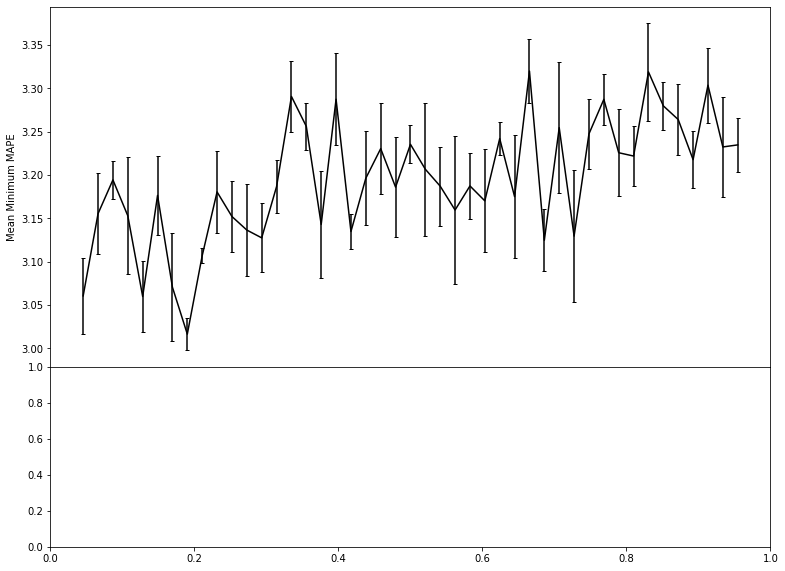

In [13]:
fig = plt.figure(figsize= (10,5))
ax = fig.add_axes((0,0,1,1))
#ax.plot(batch_sizes,np.ones_like(batch_sizes)*1.7,'r--')
ax.errorbar(batch_sizes,mean_min_mape,mse,color = 'black',capsize= 2)
ax.set_xlabel('Batch Size')
ax.set_ylabel('Mean Minimum MAPE')
asx = fig.add_axes((0,-.5,1,0.5))

In [12]:
fig.savefig('../Figures/Batch_size.png',dpi = 300)